In [7]:
import pandas as pd
import os, re, glob

In [13]:
data_paths = glob.glob("../Data/Crawling_Data/*.csv")

In [14]:
df = pd.DataFrame()

In [17]:
for pat in data_paths:
    one_product_df = pd.read_csv(pat)
    df = pd.concat([df,one_product_df],axis=0)

In [20]:
# 분석할 데이터 양은 약 3000개
df.shape

(3030, 48)

In [22]:
df["검색어"].value_counts()

스타일러 리뷰          453
레트로3 리뷰          439
미니11 리뷰          395
제모기 리뷰           233
큐커 리뷰            205
트리플케어 리뷰         171
유팡플러스 리뷰         144
코드제로a9 리뷰        133
인스픽 리뷰           112
wf-1000xm4 리뷰    112
미니40 리뷰          106
SQ1 리뷰            92
클린이소프트 리뷰         91
무릎마사지기 리뷰         63
더프리스타일 리뷰         53
마사지기s 리뷰          53
에어카트리지 리뷰         26
빈프레소 리뷰           24
클링봇 리뷰            22
카모플라쥬 리뷰          22
마사지기SE 리뷰         18
에어맘 리뷰            14
마사지기s Duo 리뷰      12
IXP-3000 리뷰        8
뮤패드L10 리뷰          7
쿠쿠 제빵기 리뷰          6
무르비2 리뷰            6
타워QS 리뷰            5
홈브루 리뷰             5
Name: 검색어, dtype: int64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\anaconda3\envs\openlab\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User\anaconda3\envs\openlab\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\openlab\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\openlab\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\openlab\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWar

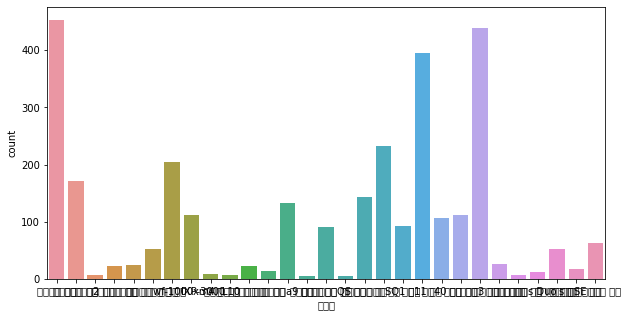

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(df["검색어"])

plt.show();


In [34]:
df_group = df[["검색어","url"]].groupby(["검색어"]).agg("count")

C:\Users\User\anaconda3\envs\openlab\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='url'>

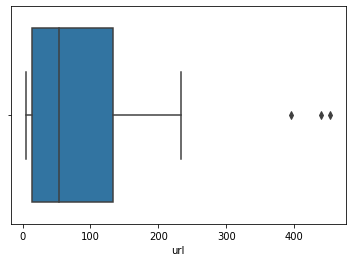

In [36]:
sns.boxplot(df_group["url"])

In [37]:
df_group["url"].describe()

count     29.000000
mean     104.482759
std      129.163136
min        5.000000
25%       14.000000
50%       53.000000
75%      133.000000
max      453.000000
Name: url, dtype: float64

현재 약 3000개 중에 샘플링을 뽑아서 라벨링을 진행하고자 생각을 한다. 왜냐하면 모든 3천개에 대해서 다 해도 좋다. 하지만 3천 개중 특정 상품의 정보가 많아 특정 상품의 특징이 컨텍스트로 인식되어 편향될 것으로 판단되고 또 특정 상품은 리뷰 수가 적어서 해당 제품으로 훈련을 시킨다고 해도 데이터가 많은 쪽에 과중되게 학습될것으로 생각되어 진다. __`즉 나는 현재 이 데이터에 대해서 데이터 불균형 문제가 존재한다고 판단된다.`__
<br><br>
__`그래서 해당 리뷰에 대해서 뽑힌 집단에서 네이버에 존재하는 전체 특정 상품의 블로그 리뷰가 평균적으로 몇개가 존재하는지 추정을 하고, 추정된 개수 바탕으로 샘플링을 진행하여 라벨링한다면... 균형있게 상품의 특징을 학습되지 않을까 라는 생각을 하게 되었다.`__


(array([13.,  5.,  4.,  2.,  1.,  1.,  0.,  0.,  1.,  2.]),
 array([  5. ,  49.8,  94.6, 139.4, 184.2, 229. , 273.8, 318.6, 363.4,
        408.2, 453. ]),
 <BarContainer object of 10 artists>)

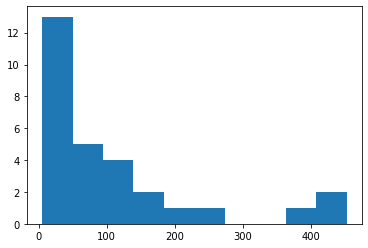

In [38]:
plt.hist(df_group["url"])

(array([6., 1., 2., 4., 0., 3., 5., 3., 2., 3.]),
 array([1.79175947, 2.22439324, 2.65702701, 3.08966079, 3.52229456,
        3.95492833, 4.38756211, 4.82019588, 5.25282965, 5.68546343,
        6.1180972 ]),
 <BarContainer object of 10 artists>)

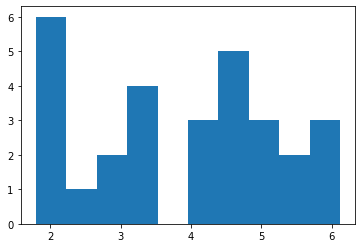

In [43]:
import numpy as np

plt.hist(np.log1p(df_group["url"]))

In [46]:
df_group["url"].sample(10)

검색어
큐커 리뷰           205
에어카트리지 리뷰        26
코드제로a9 리뷰       133
타워QS 리뷰           5
제모기 리뷰          233
뮤패드L10 리뷰         7
마사지기s Duo 리뷰     12
트리플케어 리뷰        171
에어맘 리뷰           14
카모플라쥬 리뷰         22
Name: url, dtype: int64

In [53]:
dict_p = {
    "A":[],
    "B":[],
    "C":[],
}

In [81]:
A1 = pd.DataFrame(df_group["url"].index)

In [82]:
del_A = list(name["검색어"].values)

In [88]:
DfA = A1.sample(10,replace=False)

In [93]:
A1.drop(DfA.index).sample(10)

,검색어
20,카모플라쥬 리뷰
12,미니40 리뷰
26,타워QS 리뷰
5,마사지기SE 리뷰
25,클링봇 리뷰
28,홈브루 리뷰
8,무르비2 리뷰
0,IXP-3000 리뷰
16,에어카트리지 리뷰
24,클린이소프트 리뷰


In [80]:
name = A1.sample(10,replace=False)
name

,검색어
4,레트로3 리뷰
12,미니40 리뷰
8,무르비2 리뷰
6,마사지기s Duo 리뷰
9,무릎마사지기 리뷰
22,쿠쿠 제빵기 리뷰
11,미니11 리뷰
21,코드제로a9 리뷰
5,마사지기SE 리뷰
24,클린이소프트 리뷰


In [56]:
A1 = df_group["url"].sample(10,replace=False)
A1

검색어
에어맘 리뷰        14
SQ1 리뷰        92
제모기 리뷰       233
코드제로a9 리뷰    133
큐커 리뷰        205
마사지기s 리뷰      53
빈프레소 리뷰       24
미니11 리뷰      395
클링봇 리뷰        22
트리플케어 리뷰     171
Name: url, dtype: int64

In [59]:
list(A1.index), A1.sum()

(['에어맘 리뷰',
  'SQ1 리뷰',
  '제모기 리뷰',
  '코드제로a9 리뷰',
  '큐커 리뷰',
  '마사지기s 리뷰',
  '빈프레소 리뷰',
  '미니11 리뷰',
  '클링봇 리뷰',
  '트리플케어 리뷰'],
 1342)

In [97]:
A1 = pd.DataFrame(df_group["url"].index)

In [98]:
A1.drop(DfA.index).sample(10)

,검색어
7,마사지기s 리뷰
28,홈브루 리뷰
26,타워QS 리뷰
8,무르비2 리뷰
21,코드제로a9 리뷰
23,큐커 리뷰
4,레트로3 리뷰
20,카모플라쥬 리뷰
16,에어카트리지 리뷰
0,IXP-3000 리뷰


# 작업량 제비 뽑기

In [184]:
dict_p = {
    
}

In [185]:
A1 = pd.DataFrame(df_group["url"].index)
for i in ["장","김","오"]:
    total = []
    total_contents = []
    total_pixnumber = []
    for _ in range(10):
        if A1.shape[0] !=0:
            select_A1 = A1.sample(1)
            total.append(list(select_A1.index)[0])
            total_contents.append(A1.loc[select_A1.index]["검색어"].values[0])
            total_pixnumber.append(df_group.loc[A1.loc[select_A1.index]["검색어"].values[0]].values[0])
            A1 = A1.drop(select_A1.index)
    dict_p[i] = [total_contents, sum(total_pixnumber)]

In [189]:
import time

for i in ["오","김","장"]:
    # time.sleep(4)
    print("작업자 : ",i)
    print(len(dict_p[i][0]))
    print("작업 해야하는 양 : ",dict_p[i][1])
    print("작업 해야하는 상품명 : ",dict_p[i][0])
    print()
    print("-----------------------------")
    # time.sleep(10)

작업자 :  오
9
작업 해야하는 양 :  847
작업 해야하는 상품명 :  ['에어카트리지 리뷰', '트리플케어 리뷰', '클링봇 리뷰', '마사지기SE 리뷰', '에어맘 리뷰', '레트로3 리뷰', '마사지기s Duo 리뷰', '더프리스타일 리뷰', 'SQ1 리뷰']

-----------------------------
작업자 :  김
10
작업 해야하는 양 :  1185
작업 해야하는 상품명 :  ['무르비2 리뷰', '홈브루 리뷰', '큐커 리뷰', '빈프레소 리뷰', '쿠쿠 제빵기 리뷰', '코드제로a9 리뷰', '제모기 리뷰', '스타일러 리뷰', 'IXP-3000 리뷰', '인스픽 리뷰']

-----------------------------
작업자 :  장
10
작업 해야하는 양 :  998
작업 해야하는 상품명 :  ['클린이소프트 리뷰', '유팡플러스 리뷰', '무릎마사지기 리뷰', '카모플라쥬 리뷰', '미니40 리뷰', '마사지기s 리뷰', '미니11 리뷰', '뮤패드L10 리뷰', '타워QS 리뷰', 'wf-1000xm4 리뷰']

-----------------------------


In [187]:
847+1185+998

3030